<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Instalamos Tensorflow

In [0]:
#!pip install tensorflow==2.0.0-beta1

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
# Importamos librerias 

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


# Importamos Dataset Fashion MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Exploramos el numero de imagenes 

In [7]:
len(train_labels) # 6000 imagenes de entrenamiento

60000

In [8]:
train_labels # 10 etiquetas 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Dimensiones de nuestras imagenes

In [9]:
train_images.shape  # 6000 Imagenes de entrenamiento

(60000, 28, 28)

In [10]:
test_images.shape  # 10000 Imagenes de validación

(10000, 28, 28)

# Visualización de imagen

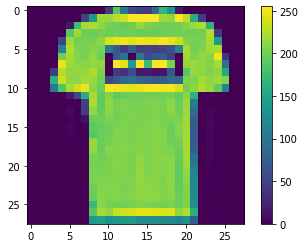

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalización de nuestro dataset 

A continuación dividimos nuestras imagenes por 255 para obtener valores entre 0 y 1 

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Visualizamos algunas imagenes para verificar el etiquetado 

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

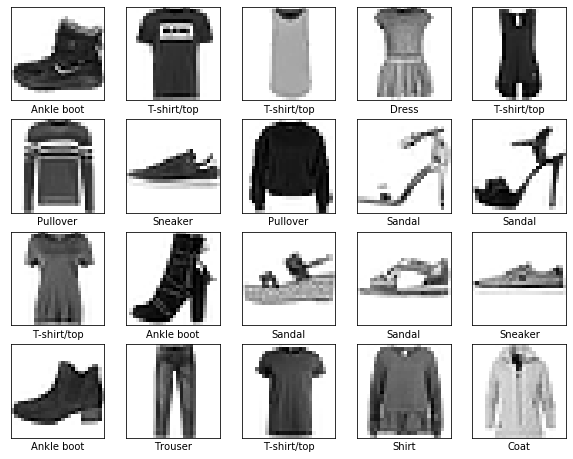

In [14]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Transformamos el tamaño de nuestras imagenes


In [15]:

train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

print(train_images.shape)
print('\n')
print(test_images.shape)

(60000, 28, 28, 1)


(10000, 28, 28, 1)


In [0]:
# Cargamos archivos a Colab 

#from google.colab import files
#uploaded = files.upload()

# Arquitectura LeNet-5



  <tr><td>
    <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>

**NOTA :** Hacemos uso una arquitectura muy conocida y usada en las redes convolucionales para configurar las capas de nuestro modelo 

In [0]:
model = keras.Sequential([
    
    # CONV1 Y MAX-POOLING1
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # CONV2 Y MAX-POOLING2
    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # Aplanar, FC1, FC2 y salida
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

# Compilamos nuestro modelo

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos nuestro modelo

In [20]:
model.fit(train_images, train_labels, epochs=300,batch_size=128,verbose=1)

Train on 60000 samples
Epoch 1/300
60000/60000 [==============================] - 4s 65us/sample - loss: 1.9894 - accuracy: 0.3267
Epoch 2/300
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8012 - accuracy: 0.7116
Epoch 3/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6386 - accuracy: 0.7640
Epoch 4/300
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5689 - accuracy: 0.7919
Epoch 5/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5253 - accuracy: 0.8091
Epoch 6/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4930 - accuracy: 0.8222
Epoch 7/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4690 - accuracy: 0.8331
Epoch 8/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4501 - accuracy: 0.8400
Epoch 9/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4355 - accuracy: 0.8457
Epoch

# Desempeño del modelo

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.4987 - accuracy: 0.8937

Test accuracy: 0.8937


# Predicciones del modelo

In [0]:
predictions = model.predict(test_images)

In [23]:
np.argmax(predictions[5])

1

In [24]:
test_labels[5]

1

In [25]:
predictions.shape

(10000, 10)

In [26]:
predictions[0]

array([9.3851292e-18, 5.9824914e-23, 2.5505496e-13, 2.0174292e-15,
       1.0159031e-14, 1.5459630e-09, 5.8878948e-17, 3.0693183e-05,
       6.7275074e-10, 9.9996936e-01], dtype=float32)

# Transformamos nuestra imagen

In [27]:
test_images.shape

(10000, 28, 28, 1)

In [28]:
test_images = test_images.reshape(10000,28,28)

print('\n')
print(test_images.shape)



(10000, 28, 28)


# Prediccion de todas la clases

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


# Visualizamos una imagen en particular


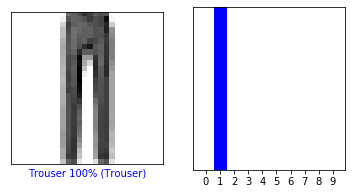

In [32]:
i = 24
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Matriz de confusión

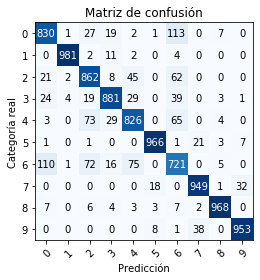

In [31]:
from matriz_confusion import graficar_matriz_de_confusion

y_pred = np.argmax(predictions,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(test_labels, y_pred, etiquetas)

# Observaciones

Como podemos observar en nustra matriz de confusión las categorias que mejor predice nuestro modelo fueron : 

1. **Pantalón**
2. **Bolsos**
3. **Sandalias**

La categoria que tuvo mas desaciertos fue la categoria ***camisas*** , como recomendación queda probar con otras arquitecturas ya entrenadas y jugar con los parametros de epocas y tamaño de lote , a continuación comparto la siguiente tabla de acuerdo teniendo en cuenta diferentes configuraciones de entrenamiento.

<table>
  <tr>
    <th>Epocas</th>
    <th>Tamaño</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>10</td>
    <td>128</td>
    <td>0.82</td>
  </tr>
  <tr>
    <td>100</td>
    <td>128</td>
    <td>0.88</td>
  </tr>
    <tr>
    <td>300</td>
    <td>128</td>
    <td>0.893</td>
  </tr>
    <tr>

</table>

# FINAL ......